In [26]:

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [27]:
stock = ['KO', 'PEP', 'NFLX', 'AMZN']
data = web.DataReader(stock,data_source="yahoo",start='12/01/2018',end='11/05/2019')['Adj Close']

In [28]:
data=data.iloc[::-1]
print(data.round(2))


Symbols        AMZN     KO    NFLX     PEP
Date                                      
2019-11-06  1795.77  52.80  288.59  134.44
2019-11-05  1801.71  52.42  288.03  134.01
2019-11-04  1804.66  53.14  292.86  135.16
2019-11-01  1791.44  53.90  286.81  136.93
2019-10-31  1776.66  54.43  287.41  137.17
2019-10-30  1779.99  53.94  291.45  136.90
2019-10-29  1762.71  53.41  281.21  136.08
2019-10-28  1777.08  53.57  281.86  136.57
2019-10-25  1761.33  53.75  276.82  136.64
2019-10-24  1780.78  54.61  271.50  137.89
2019-10-23  1762.17  54.64  271.27  137.45
2019-10-22  1765.73  53.85  266.69  136.66
2019-10-21  1785.66  54.23  278.05  136.12
2019-10-18  1757.51  54.78  275.30  136.25
2019-10-17  1787.48  53.79  293.35  136.96
2019-10-16  1777.43  53.49  286.28  136.42
2019-10-15  1767.38  53.51  284.25  136.33
2019-10-14  1736.43  53.30  285.53  137.45
2019-10-11  1731.92  53.30  282.93  137.64
2019-10-10  1720.26  53.66  280.48  137.89
2019-10-09  1721.99  53.83  267.53  137.85
2019-10-08 

In [29]:
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

Symbols     AMZN    KO  NFLX   PEP
Date                              
2019-11-06   NaN   NaN   NaN   NaN
2019-11-05  0.33 -0.72 -0.19 -0.32
2019-11-04  0.16  1.37  1.68  0.86
2019-11-01 -0.73  1.43 -2.07  1.31
2019-10-31 -0.83  0.98  0.21  0.18
2019-10-30  0.19 -0.90  1.41 -0.20
2019-10-29 -0.97 -0.98 -3.51 -0.60
2019-10-28  0.82  0.30  0.23  0.36
2019-10-25 -0.89  0.34 -1.79  0.05
2019-10-24  1.10  1.60 -1.92  0.91
2019-10-23 -1.05  0.05 -0.08 -0.32
2019-10-22  0.20 -1.45 -1.69 -0.57
2019-10-21  1.13  0.71  4.26 -0.40
2019-10-18 -1.58  1.01 -0.99  0.10
2019-10-17  1.71 -1.81  6.56  0.52
2019-10-16 -0.56 -0.56 -2.41 -0.39
2019-10-15 -0.57  0.04 -0.71 -0.07
2019-10-14 -1.75 -0.39  0.45  0.82
2019-10-11 -0.26  0.00 -0.91  0.14
2019-10-10 -0.67  0.68 -0.87  0.18
2019-10-09  0.10  0.32 -4.62 -0.03
2019-10-08 -0.96 -0.46  1.19 -0.44
2019-10-07  1.59  0.54  1.38  0.80
2019-10-04  0.40  1.24 -0.61  1.40
2019-10-03 -0.88 -1.28 -1.70 -1.68
2019-10-02 -0.65 -1.41 -0.04 -2.89
2019-10-01  1.31  2.

In [36]:
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

Symbols
AMZN    0.000101
KO     -0.000296
NFLX    0.000319
PEP    -0.000606
dtype: float64
Symbols      AMZN        KO      NFLX       PEP
Symbols                                        
AMZN     0.000316  0.000048  0.000273  0.000070
KO       0.000048  0.000134  0.000031  0.000069
NFLX     0.000273  0.000031  0.000593  0.000060
PEP      0.000070  0.000069  0.000060  0.000095


In [37]:
num_iterations = 10000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))


In [38]:
for i in range(num_iterations):
        weights = np.array(np.random.random(4))
        weights /= np.sum(weights)
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [39]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
sim_frame.head (5)
sim_frame.tail (5)

,ret,stdev,sharpe,KO,PEP,NFLX,AMZN
9995,-0.000294,0.010940,-0.026851,0.205915,0.000798,0.179935,0.613352
9996,-0.000350,0.010336,-0.033872,0.306843,0.029476,0.032379,0.631303
9997,0.000096,0.017110,0.005597,0.894247,0.022555,0.067808,0.015390
9998,-0.000105,0.012640,-0.008286,0.042958,0.300503,0.408306,0.248232
9999,-0.000003,0.013511,-0.000246,0.349598,0.258845,0.297629,0.093928


In [40]:
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print("Portafolio maximizado sharpe:\n", max_sharpe)
print ("Portafolio para minimo riesgo:\n", min_std)

Portafolio maximizado sharpe:
 ret       0.000298
stdev     0.023461
sharpe    0.012705
KO        0.046649
PEP       0.002214
NFLX      0.940527
AMZN      0.010610
Name: 5350, dtype: float64
Portafolio para minimo riesgo:
 ret      -0.000440
stdev     0.009218
sharpe   -0.047776
KO        0.039768
PEP       0.303027
NFLX      0.047231
AMZN      0.609973
Name: 3135, dtype: float64


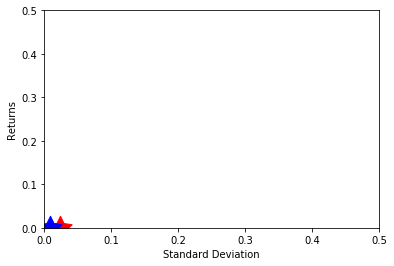

In [43]:
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(0,.5)
plt.xlim(0,.5)
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()